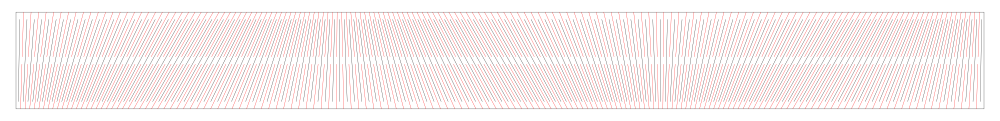

In [14]:
import drawSvg as draw
import math
import numpy as np

class Drawing:
    def __init__(self):
        self.w = 400
        self.h = 40
        self.border = 10
        self.d = draw.Drawing(self.w + self.border, self.h + self.border)
    
    def rect(self, x, y, w, h):
        self.d.append(draw.Rectangle(x + self.border / 2, \
                                     y + self.border / 2, \
                                     w, \
                                     h, \
                                     stroke='black', \
                                     fill ='none', \
                                     stroke_width = 0.1))
        
    def line(self, x1, y1, x2, y2, color='black'):
        self.d.append(draw.Line(x1 + self.border / 2, \
                                y1 + self.border / 2, \
                                x2 + self.border / 2, \
                                y2 + self.border / 2, \
                                stroke=color, \
                                stroke_width = 0.1))
    
mobius = Drawing()
mobius.rect(0,0,mobius.w,mobius.h)

end_angle = (2 * math.pi) * 1.5
spacing = 2.5 / 2 # mm - spacing between lines
edging = 3.0 # mm - gap between outer lines or between center line and edge
step = end_angle* spacing / mobius.w

center_line = True

for angle in np.arange(step, end_angle - step / 2, step):   
    x_center = angle * mobius.w / end_angle 
    angular_offset = math.sin(angle) * (30.0 * math.pi / 180.0)
    
    if(center_line):
        # TODO: Center lines should be 'edging' short of edges, without adjusting angle
        trim_distance_offset = (mobius.h / 2 - edging) * math.tan(angular_offset)
        mobius.line(x_center - trim_distance_offset, \
                    edging, \
                    x_center + trim_distance_offset, \
                    mobius.h - edging)   
    else:
        # TODO: Should be 'edging' mm gap between two lines here
        distance_offset = (mobius.h / 2) * math.tan(angular_offset)
        center_offset = ((edging / 2) * math.tan(angular_offset))
        mobius.line(x_center + center_offset, \
                    mobius.h/2 + (edging / 2), \
                    x_center + distance_offset, \
                    mobius.h, \
                    color='red')           
        mobius.line(x_center - center_offset, \
                    mobius.h/2 - (edging / 2), \
                    x_center - distance_offset, \
                    0, \
                    color='red')           

    center_line = not center_line


mobius.d.setPixelScale(2)  # Set number of pixels per geometry unit
mobius.d.saveSvg('mobius.svg')
mobius.d.setRenderSize(w=1000)
mobius.d  # Display as SVG
